# DH199 Report Three Preparation

## 1. Data Exploration

### 1.1 Data Cleaning

The data cleaning process: https://github.com/lizhouf/dh199_spring19/blob/data_cleaning/DH199_Treaty_Council_Corpus_Data_Cleaning.ipynb

The data to be used is now stored as "treaties_datetime_sentiments_cleaned.csv" in https://github.com/lizhouf/dh199_spring19/blob/data_cleaning/treaties_datetime_sentiments_cleaned.csv

### 1.2 Import packages and cleaned data

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("treaties_datetime_sentiments_cleaned.csv")
df.head()

,Unnamed: 0,Document,Treaty Name,Council Start Date,Council End Date,Council City,Council State,Speaker,Position,Native | Non-Native,...,neu,compound,Negative,Positive,start_year,start_month,start_day,end_year,end_month,end_day
0,0,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,...,0.809,0.9989,False,True,1768,10,24,1768,11,5
1,1,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Abraham,Chief,Native,...,0.820,0.9706,False,True,1768,10,24,1768,11,5
2,2,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,...,0.894,0.2960,False,True,1768,10,24,1768,11,5
3,3,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Native Speaker,NaN,Native,...,0.882,-0.3327,True,False,1768,10,24,1768,11,5
4,4,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Native Speaker,NaN,Native,...,0.817,0.8460,False,True,1768,10,24,1768,11,5


### 1.2 Select Nations of Interest

In [2]:
### Count number of records by nation
# make a list of all the (unique) native nations
nations = list(df[df["Native | Non-Native"]=="Native"]["Tribe or Ethnicity"].unique())

In [3]:
# Get rid of nan and the group of nations
nations.pop(2)
nations.pop(12)
nations

['Oneida',
 'Mohawk',
 'Aghquessaine',
 'Chauvrons',
 'Wea',
 'Miamis',
 'Potawatomi',
 'Ottawas',
 'Chippewa',
 'Seneca',
 'Scioto',
 'Delawares',
 'Shawanese',
 'Mingo',
 'Wyandott',
 'Kickapoo',
 'Mohegan',
 'Sawkies',
 'Piankeshaw',
 'Chickasaws']

In [4]:
### count the number of records for each item in the nation's list
# Visualize the count
nations_count = pd.DataFrame()
nations_count["nation"] = nations
counts = []
for i in nations:
    counts.append(len(df[df["Tribe or Ethnicity"]==i]))
nations_count["count"] = counts
nations_count.sort_values(by = ["count"],ascending = False, inplace=True)
nations_count

,nation,count
11,Delawares,8
4,Wea,6
5,Miamis,6
6,Potawatomi,6
0,Oneida,5
9,Seneca,5
12,Shawanese,5
7,Ottawas,3
1,Mohawk,3
15,Kickapoo,2


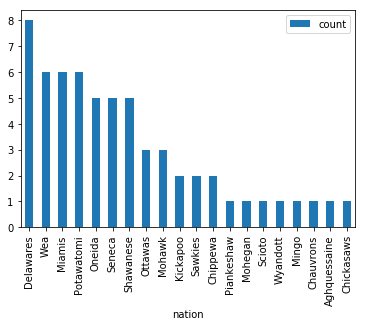

In [6]:
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
nations_count.plot(kind="bar", x="nation")

In [7]:
# we are interested in the data for nations with >4 records
nations_selected = []
for i in nations:
    if len(df[df["Tribe or Ethnicity"]==i])>4:
        nations_selected.append(i)

# select the data for the nations of interest
# reference: df operations: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/#iloc-selection
df_natives = df[df["Tribe or Ethnicity"].isin(nations_selected)].iloc[:,1:].reset_index(drop=True)
df_natives.head()

,Document,Treaty Name,Council Start Date,Council End Date,Council City,Council State,Speaker,Position,Native | Non-Native,Tribe or Ethnicity,...,neu,compound,Negative,Positive,start_year,start_month,start_day,end_year,end_month,end_day
0,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0.809,0.9989,False,True,1768,10,24,1768,11,5
1,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0.894,0.2960,False,True,1768,10,24,1768,11,5
2,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Tagwaron,Chief,Native,Oneida,...,0.806,0.9820,False,True,1768,10,24,1768,11,5
3,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Native Speakers,NaN,Native,Oneida,...,0.881,0.9343,False,True,1768,10,24,1768,11,5
4,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0.901,0.9779,False,True,1768,10,24,1768,11,5


In [8]:
df_natives.columns

Index(['Document', 'Treaty Name', 'Council Start Date', 'Council End Date',
       'Council City', 'Council State', 'Speaker', 'Position',
       'Native | Non-Native', 'Tribe or Ethnicity', 'Text', 'neg', 'pos',
       'neu', 'compound', 'Negative', 'Positive', 'start_year', 'start_month',
       'start_day', 'end_year', 'end_month', 'end_day'],
      dtype='object')

## 2. Data Pre-processing

### 2.1 Tokenize Words and Sentences

In [9]:
from nltk.tokenize import sent_tokenize, word_tokenize
df_natives["word_tokens"] = df_natives.Text.apply(lambda x: word_tokenize(x))
df_natives["sent_tokens"] = df_natives.Text.apply(lambda x: sent_tokenize(x))
df_natives.head()

,Document,Treaty Name,Council Start Date,Council End Date,Council City,Council State,Speaker,Position,Native | Non-Native,Tribe or Ethnicity,...,Negative,Positive,start_year,start_month,start_day,end_year,end_month,end_day,word_tokens,sent_tokens
0,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,False,True,1768,10,24,1768,11,5,"[At, a, Congress, with, the, several, Nations,...",[At a Congress with the several Nations on Tue...
1,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,False,True,1768,10,24,1768,11,5,"[Then, Canaghquieson, addressed, the, whole, a...",[Then Canaghquieson addressed the whole and de...
2,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Tagwaron,Chief,Native,Oneida,...,False,True,1768,10,24,1768,11,5,"[At, night, Tagawaron, returned, with, the, Ma...",[At night Tagawaron returned with the Map to S...
3,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Native Speakers,NaN,Native,Oneida,...,False,True,1768,10,24,1768,11,5,"[At, 10, A, M., The, Oneidas, returned, to, Si...",[At 10 A M. The Oneidas returned to Sir Willia...
4,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,False,True,1768,10,24,1768,11,5,"[At, night, Canaquieson, came, to, inform, Sir...",[At night Canaquieson came to inform Sir Willi...


### 2.2 Remove Stopwords

In [10]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# we only remove the stopwords for the tokenized words
# to keep the syntaxes of the texts original

def filter_stopwords(words, stopWords):
    wordsFiltered = []
    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
    return wordsFiltered

df_natives.word_tokens = df_natives.word_tokens.apply(lambda x: filter_stopwords(x, stop_words))

### 2.3 Stemmatizing

In [11]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [12]:
def stem_words(words):
    wordsStemmed = []
    for w in words:
        wordsStemmed.append(ps.stem(w))
    return wordsStemmed

df_natives.word_tokens = df_natives.word_tokens.apply(lambda x: stem_words(x))

### 2.4 Identify Symbols

We can identify the general symbols for each of the text above, from the list https://www.warpaths2peacepipes.com/native-american-symbols/list-of-symbols.htm; we stored the possible symbols in a csv file.

In [13]:
# make a list of all the words that might be used by the nations
df_symbols = pd.read_csv("symbols.csv")
df_symbols.head()

,Names of Symbols,Meanings of Symbols
0,Arrow,Meaning of Arrow symbol
1,Arrowhead,Meaning of Arrowhead symbol
2,Avanyu,Meaning of Avanyu symbol
3,Bear,Meaning of Bear symbol
4,Bear Track,Meaning of Bear Track symbol


In [14]:
print("There are", df_symbols.shape[0], "possible symbols.")

There are 109 possible symbols.


In [15]:
symbols = list(df_symbols["Names of Symbols"])
len(symbols)

109

In [16]:
# stem the symbols and make them unique
symbol_stems = list(set(stem_words(symbols)))

## 3. Text Analysis around Specific Research Questions

### 3.1 What symbols are being used?

In [17]:
# add all the symbols as columns in the df
print("Shape of df_natives before adding is", list(df_natives.shape))
for w in symbol_stems:
    df_natives[w] = [0]*len(df_natives)
print("Shape of df_natives after adding is", list(df_natives.shape))

Shape of df_natives before adding is [41, 25]
Shape of df_natives after adding is [41, 134]


In [18]:
df_natives.head()

,Document,Treaty Name,Council Start Date,Council End Date,Council City,Council State,Speaker,Position,Native | Non-Native,Tribe or Ethnicity,...,fire,scalp,piasa dragon,owl,deer track,horned serp,butterfli,crow,feathered serp,swastika
0,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
1,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
2,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Tagwaron,Chief,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
3,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Native Speakers,NaN,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
4,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0


In [19]:
for i in range(len(df_natives)):
    for j in range(len(df_natives.columns)):
        if j>24:
            df_natives.iloc[i,j]=df_natives["word_tokens"][i].count(symbol_stems[j-25])

In [20]:
# df_natives.to_csv('df_natives2.csv')
# after see the significant results, like brother, we conclude that this action is possible
# this takes me 5 hours to debug
# and finally end up with a single solution

In [21]:
print("There are", sum(df_natives[symbol_stems].sum()>0), "symbols occuring.")

There are 24 symbols occuring.


In [22]:
# select the columns needed from the symbol_stems
symbols_natives = df_natives[symbol_stems]

In [23]:
# drop the not used symbols
for col in symbols_natives:
    if not symbols_natives[col].sum():
        symbols_natives.drop(col, axis=1, inplace=True)

/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [24]:
# select the columns needed from the original df_natives
col_needed = ["Tribe or Ethnicity", "word_tokens", "pos", "neg"]
short_natives = df_natives[col_needed]
short_natives.head()

,Tribe or Ethnicity,word_tokens,pos,neg
0,Oneida,"[At, congress, sever, nation, tuesday, 25th, o...",0.155,0.036
1,Oneida,"[then, canaghquieson, address, whole, desir, s...",0.106,0.000
2,Oneida,"[At, night, tagawaron, return, map, sir, willi...",0.162,0.032
3,Oneida,"[At, 10, A, M., the, oneida, return, sir, will...",0.091,0.028
4,Oneida,"[At, night, canaquieson, came, inform, sir, wi...",0.094,0.005


In [25]:
# combine the two dfs
data = pd.concat([short_natives, symbols_natives], axis=1, join_axes=[short_natives.index])
data.head()

,Tribe or Ethnicity,word_tokens,pos,neg,man,hors,hope,life,protect,death,...,brother,lake,war,sister,journey,hand,winter,friendship,fire,scalp
0,Oneida,"[At, congress, sever, nation, tuesday, 25th, o...",0.155,0.036,0,0,2,0,0,1,...,12,0,0,0,0,2,0,0,2,0
1,Oneida,"[then, canaghquieson, address, whole, desir, s...",0.106,0.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Oneida,"[At, night, tagawaron, return, map, sir, willi...",0.162,0.032,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Oneida,"[At, 10, A, M., the, oneida, return, sir, will...",0.091,0.028,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Oneida,"[At, night, canaquieson, came, inform, sir, wi...",0.094,0.005,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.2  Which of the symbols are used frequently?

In [26]:
symbols_count = symbols_natives.append(symbols_natives.agg(['sum']))
symbols_count.sum().sort_values(ascending=False)

brother       218
warrior        66
peac           64
hand           54
hope           46
friendship     36
war            36
fire           34
man            16
lake           16
life           10
death          10
famili          8
journey         8
protect         6
scalp           6
strength        6
earth           4
winter          4
hors            4
water           4
moon            2
eagl            2
sister          2
dtype: int64

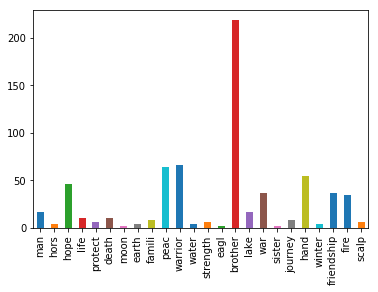

In [27]:
symbols_count.sum().plot(kind='bar')

### 3.3 Which tribes use what symbols most?

In [28]:
data1 = data.drop(["word_tokens", "neg", "pos"], axis=1)

In [29]:
symbol_by_group = data1.groupby("Tribe or Ethnicity").sum()
symbol_by_group.head()

,man,hors,hope,life,protect,death,moon,earth,famili,peac,...,brother,lake,war,sister,journey,hand,winter,friendship,fire,scalp
Tribe or Ethnicity,,,,,,,,,,,,,,,,,,,,,
Delawares,3,0,3,1,1,0,0,0,0,8,...,20,0,5,0,2,2,0,7,0,0
Miamis,0,0,1,1,0,1,0,0,0,6,...,5,0,5,0,1,5,0,1,0,1
Oneida,0,1,3,0,0,1,0,0,1,2,...,12,0,0,0,0,4,0,0,2,0
Potawatomi,2,0,6,2,1,0,1,0,2,0,...,0,2,2,1,0,4,2,0,2,0
Seneca,1,0,4,0,0,0,0,0,0,12,...,38,3,0,0,0,5,0,6,5,1


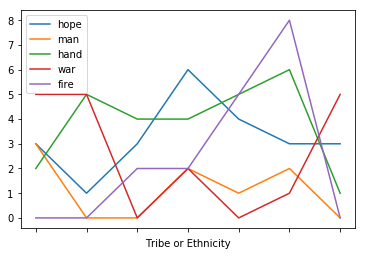

In [30]:
symbol_by_group[["hope","man","hand","war","fire"]].plot(kind="line")

From left to right: Delawares, Miamis, Oneida, Potawatomi, Seneca, Shawanese, Wea.

### 3.4 How are figurative languages used to express sentiments? Which symbols are associated with positive/negative sentiments?

*We choose fire for this discussion.* Reference: Stark, Heidi Kiiwetinepinesiik. “Marked by Fire: Anishinaabe Articulations of Nationhood in Treaty Making with the United States and Canada.” American Indian Quarterly 36, no. 2 (2012): 119–49. https://doi.org/10.5250/amerindiquar.36.2.0119.

In [31]:
# focus on per-speaker-per-statement level
# (rather than sentence/semantic group level, for now)
fire_positive = 0
for i in range(len(data)):
    fire_positive=fire_positive+(data["pos"][i]*data["fire"][i])
fire_negative = 0
for i in range(len(data)):
    fire_negative=fire_negative+(data["neg"][i]*data["fire"][i])
fire_positive_proportion = fire_positive/(fire_positive+fire_negative)
fire_nefative_proportion = fire_negative/(fire_positive+fire_negative)
print("The word fire is associated with", fire_positive_proportion, "proportion positive statements, and", fire_nefative_proportion , "proportion negative statements")

The word fire is associated with 0.753800217155266 proportion positive statements, and 0.24619978284473396 proportion negative statements


## 4. Conclusions

See the google doc for conclusions' write-up.

## 5. Limitations and Discussions

- Stopwords might need to be specified, according to the special time period of the research;
- More data need to be collected (may use the additional data Prof. Garcia provided);
- Stemmatizing is always mixing seemingly similar but actually different words together, like the word "peace" is now as "peac" in the plot.
- If time permitted, we can look into "Kinship Metaphors for Nationhood", as planned.